# Phenomics Data Notebook 1: Visualize Image Datasets








### Goal For This Notebook:

1 - Read and visualize an image<br>

2 - Understand image transformations<br>

3 - Detect the leaf area from an image<br>

---

### Table of Contents

1 - [Read and see content of image (matrix)](#section1)<br>

2 - [Understand image transformations](#section2)<br>

3 - [Detect the leaf area from an image](#section3)<br>

4 - [Conclusions](#section4)<br>

---

## 1. Read and see an image <a id ='section1'>

In [1]:
%matplotlib inline

In [2]:
from skimage import io
import matplotlib.pyplot as plt

In [3]:
#downloads image file from url
!wget 'https://www.northenlab.org/wp-content/uploads/sites/9/2022/05/EcoFAB-with-plants-3-768x857.jpg' --no-check-certificate

--2024-03-05 16:59:05--  https://www.northenlab.org/wp-content/uploads/sites/9/2022/05/EcoFAB-with-plants-3-768x857.jpg
Resolving www.northenlab.org (www.northenlab.org)... 104.18.41.115, 172.64.146.141, 2606:4700:4400::6812:2973, ...
Connecting to www.northenlab.org (www.northenlab.org)|104.18.41.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115618 (113K) [image/jpeg]
Saving to: ‘EcoFAB-with-plants-3-768x857.jpg’

EcoFAB-with-plants- 100%[===================>] 112.91K  --.-KB/s    in 0.06s   

2024-03-05 16:59:06 (1.88 MB/s) - ‘EcoFAB-with-plants-3-768x857.jpg’ saved [115618/115618]



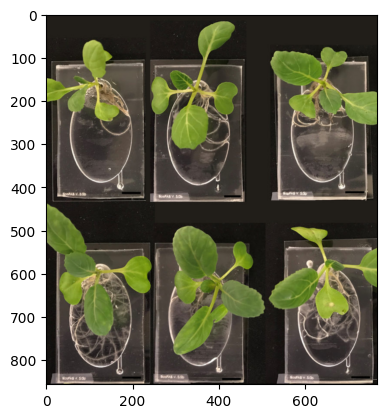

In [4]:
#downloads image file
img_file = 'EcoFAB-with-plants-3-768x857.jpg'
img = io.imread(img_file)
plt.imshow(img)

In [5]:
from sys import getsizeof
print("* Image size in mem: {}MB".format(round(getsizeof(img) / 1024 / 1024,2)))

* Image size in mem: 1.88MB


In [6]:
print('* Shape: {}'.format(img.shape))
print('* Type: {}'.format(img.dtype))
print('* Range: {}, {}'.format(img.min(), img.max()))

* Shape: (857, 768, 3)
* Type: uint8
* Range: 0, 255


(-0.5, 767.5, 856.5, -0.5)

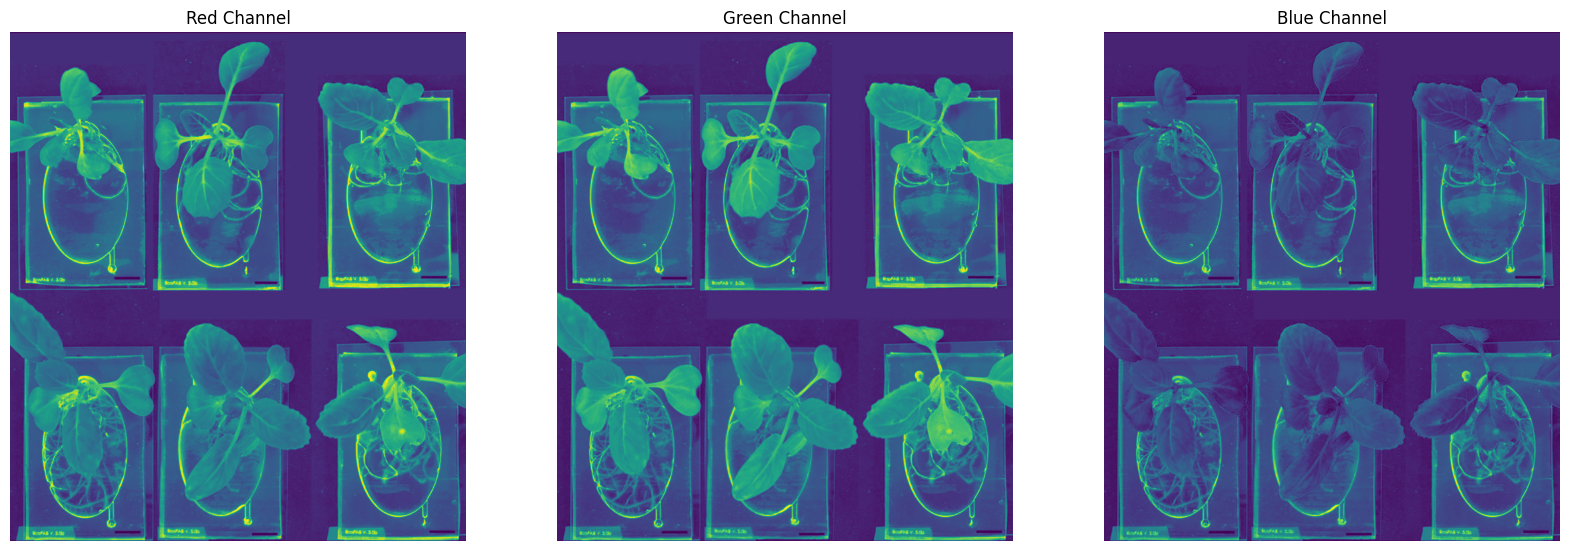

In [7]:
# Plot each channel
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(img[:,:,0])
axes[0].set_title('Red Channel')
axes[0].axis('off')  # Hide the axis

axes[1].imshow(img[:,:,1])
axes[1].set_title('Green Channel')
axes[1].axis('off')  # Hide the axis

axes[2].imshow(img[:,:,2])
axes[2].set_title('Blue Channel')
axes[2].axis('off')  # Hide the axis


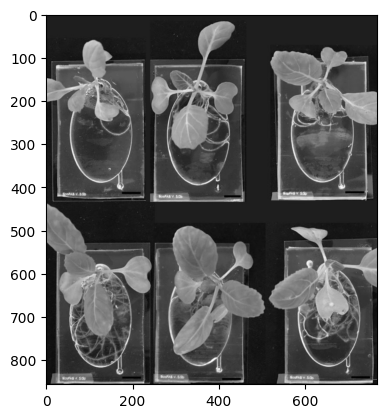

In [8]:
import numpy as np
green = img[:,:,1]
plt.imshow(green,cmap='gray')

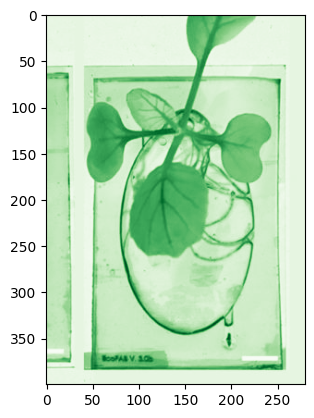

In [9]:
import numpy as np
tinygreen = img[50:450,200:480,1]
plt.imshow(tinygreen,cmap='Greens')

In [10]:
#Exercise: try slicing and using boolean on green, e.g., green > 10

In [11]:
#Yet another way to visualize your images
import plotly.express as px
downsample = 2
fig = px.imshow( green[::downsample,::downsample] )
fig.show()


## 2. Understand image transformations <a id ='section2'>

### Thresholding
- global evaluation of pixel values

Text(0.5, 1.0, 'Hist of img')

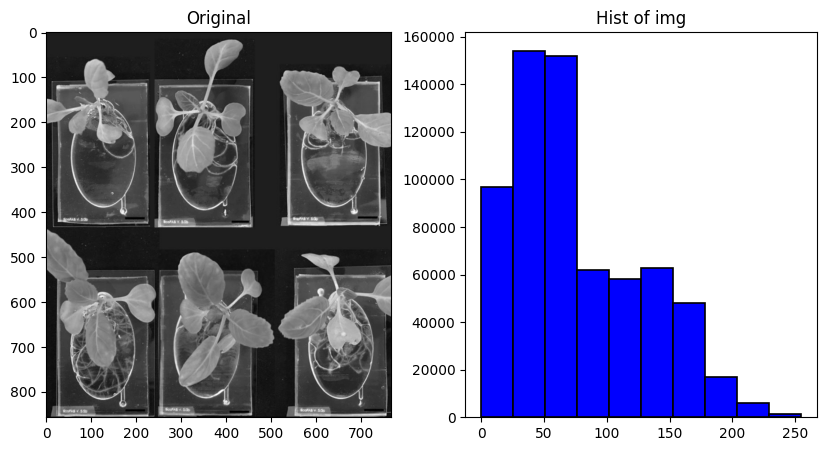

In [12]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(green,cmap='gray')
ax[0].set_title('Original')

ax[1].hist(green.flatten(),color='blue',label='gray levels',edgecolor='black', linewidth=1.2) #util.img_as_uint8 img_as_ubyte
ax[1].set_title('Hist of img')


In [13]:
#!pip install ipywidgets


In [14]:
from ipywidgets import interactive, fixed

def interactive_threshold(image, threshold=128):
    # Apply threshold
    _, ax = plt.subplots()
    ax.imshow(image > threshold, cmap='gray')
    ax.set_title(f'Threshold: {threshold}')
    plt.axis('off')
    plt.show()

widget = interactive(interactive_threshold, image=fixed(green), threshold=(0, 255, 1))

# Display the widget
display(widget)


interactive(children=(IntSlider(value=128, description='threshold', max=255), Output()), _dom_classes=('widget…

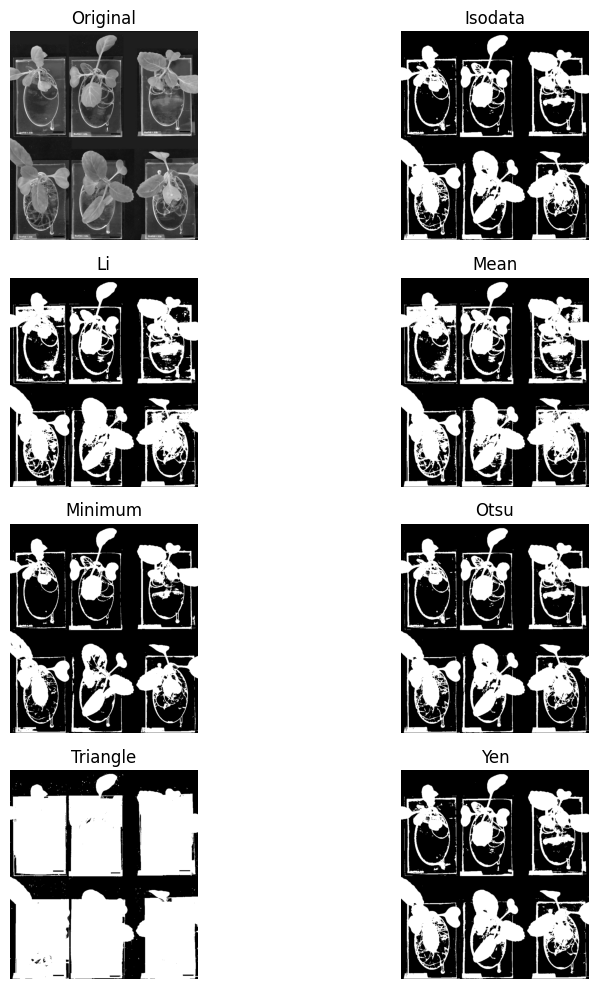

In [15]:
from skimage.filters import threshold_otsu, threshold_isodata, try_all_threshold

fig, ax = try_all_threshold(green, figsize=(10, 10), verbose=False)

### Filters
- rgb to gray: explain it is different from getting just one channel; instead it is a linear combination of the channels
- smoothing: Gaussian and median use convolution operations to smooth a pixel based on neighborhood information (aka window)
- smoothing and border-preserving: Bilateral fiter smooths regions that are semi-homogeneous but preserve borders/edges
- thresholding: uses global representation of an image, i.e., the histogram of intensity values

0.9994345098039217
255


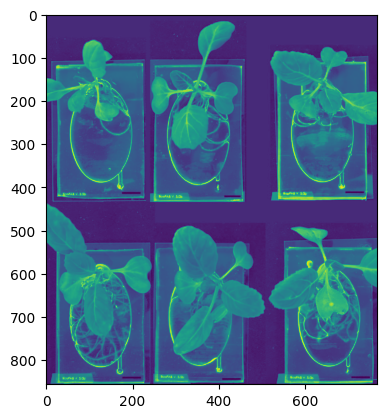

In [16]:
from skimage import util
from skimage.color import rgb2gray

img2gray = rgb2gray(img)
plt.imshow(img2gray)
print(np.max(img2gray))
img2gray = util.img_as_ubyte(img2gray)
print(np.max(img2gray))

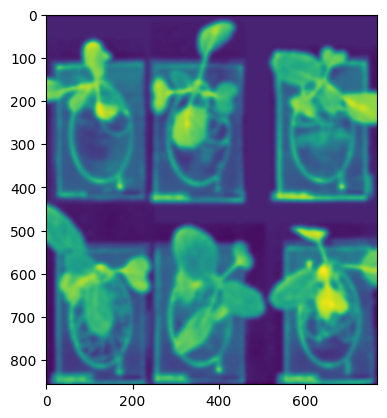

In [17]:
from skimage import filters
green2Gaussian = filters.gaussian(green,sigma=5)
plt.imshow(green2Gaussian)
green2Gaussian = util.img_as_ubyte(green2Gaussian)

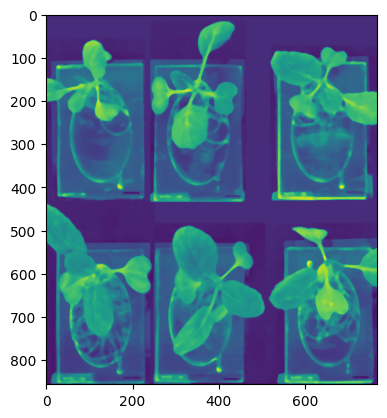

In [18]:
from skimage.morphology import disk
green2Median = filters.median(green,disk(5))
plt.imshow(green2Median)

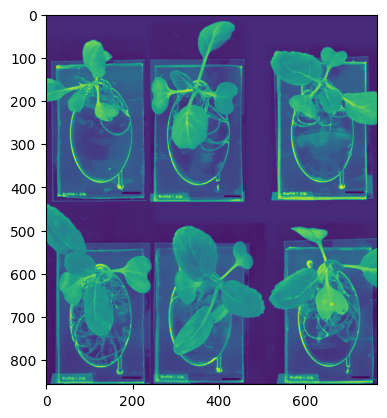

In [19]:
from skimage.filters.rank import mean_bilateral
green2bilat = (green)
green2bilat = mean_bilateral(green2bilat, disk(7), s0=10,s1=10)
plt.imshow(green2bilat)

Text(0.5, 1.0, 'Bilat')

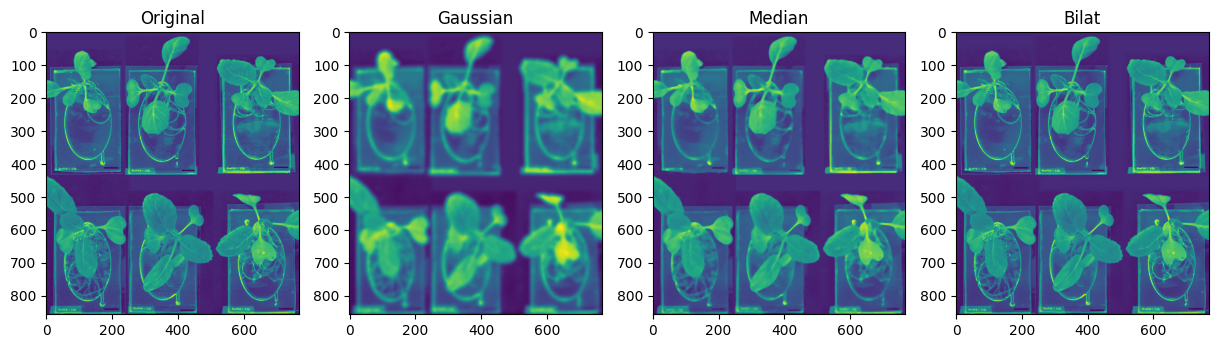

In [20]:
f, ax = plt.subplots(1, 4, figsize=(15, 10))

ax[0].imshow(green)
ax[0].set_title('Original')

ax[1].imshow(green2Gaussian)
ax[1].set_title('Gaussian')

ax[2].imshow(green2Median)
ax[2].set_title('Median')

ax[3].imshow(green2bilat)
ax[3].set_title('Bilat')

In [21]:
#Create a list to use plotly
limg2 = [green, img2gray, green2Gaussian, green2Median, green2bilat]# img in list
vimg = np.stack(limg2)
downsample = 2
fig = px.imshow( vimg[:,::downsample,::downsample] , animation_frame=0, binary_string=True, labels=dict(animation_frame="root img"))
fig.show()

## 3.  Detect the leaf area from an image <a id ='section3'>
- Enhancing green component
- When you subtract the blue channel from the green channel in an image, you're essentially enhancing the green components of the image relative to the blue ones. This manipulation can make green objects, like leaves, stand out more distinctly in the resulting image. Green leaves have high green channel intensity because they reflect green light strongly and absorb most of blue light.

Text(0.5, 1.0, 'Almost perfect')

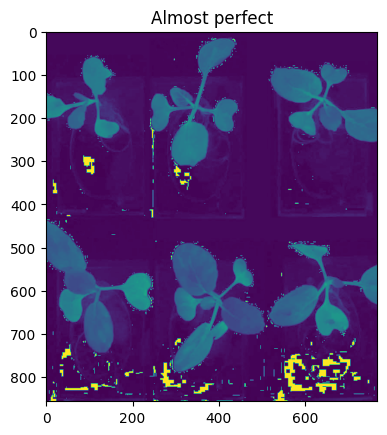

In [22]:
leaf = img[:,:,1] - img[:,:,2]
plt.imshow(leaf)
plt.title('Almost perfect')

Text(0.5, 1.0, 'Hello Leaves')

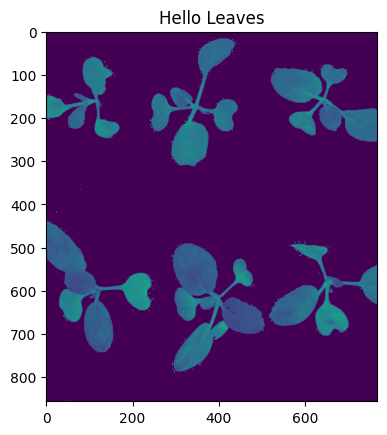

In [23]:
plt.imshow(((leaf>50) & (leaf<250)) * (leaf))
plt.title('Hello Leaves')

Tiny speckles can show up after segmentation that might be negligible to your problem. For example, you might be interested in counting the number of plants in the image or the area of the largest connected components

In [24]:
from skimage import feature, measure

binary = (leaf>50) & (leaf<250)

label_img = measure.label(binary)
regions = measure.regionprops(label_img,intensity_image=leaf)

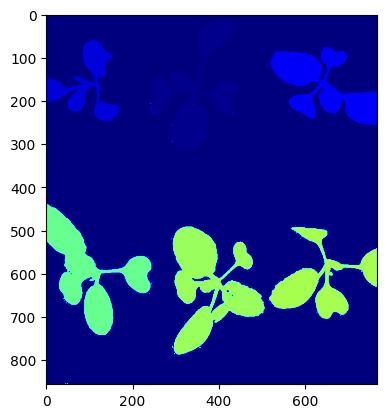

In [25]:
plt.imshow(label_img,cmap='jet')

In [26]:
area = [p.area for p in regions]
print(len(area))

147


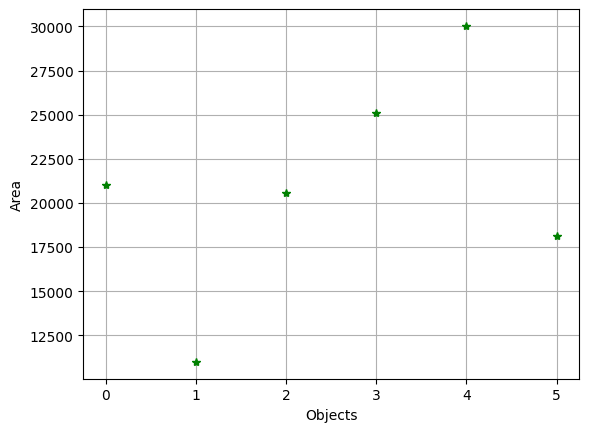

In [27]:
min_area_you_care = 20
area_array = np.array(area)
filtered_area_array = area_array[area_array>min_area_you_care]
plt.plot(filtered_area_array, '*', color='green')
plt.ylabel('Area')
plt.xlabel('Objects')
plt.grid()

In [28]:
print(f"The number of plants is: {len(filtered_area_array)}")

The number of plants is: 6


In [29]:
filtered_area_array

array([20986, 10988, 20576, 25112, 30028, 18151])

## 4. Conclusions<a id ='section4'>

Linear algebra and matrices form the bedrock of image analysis in the realm of computer vision, providing a powerful mathematical framework for manipulating and interpreting digital images. At its essence, an image can be thought of as a matrix of pixel values, where each element represents the intensity or color at a specific location. This representation makes linear algebraic operations crucial for various image processing tasks, including transformations, filtering, and compression. Techniques such as rotation, scaling, and shearing of images are achieved through matrix multiplication, while more complex operations like edge detection, blurring, and feature extraction leverage convolutions to analyze and enhance images.

**Question 1** Now that you know that color images consist of three matrices, you can create filters just like in Instagram! Write a function that creates a sepia tone of an image.

Tip:        newR = (R * 0.393 + G * 0.769 + B * 0.189)
            newG = (R * 0.349 + G * 0.686 + B * 0.168)
            newB = (R * 0.272 + G * 0.534 + B * 0.131)

In [ ]:
R = img[:,:,0] #perhaps omit this part in exercise?
G = img[:,:,1]
B = img[:,:,2]

newImg = np.zeros(img.shape,dtype=float)

newImg[:,:,0] = R * 0.393 + G * 0.769 + B * 0.189
newImg[:,:,1] = R * 0.349 + G * 0.686 + B * 0.168
newImg[:,:,2] = R * 0.272 + G * 0.534 + B * 0.131

# Clip the values to ensure within the [0, 255] range and convert to uint8
newImg = np.clip(newImg, 0, 255).astype(np.uint8)


In [ ]:
plt.imshow(newImg)

Notebook developed by: Dani Ushizima, XXX, XXX, .... Alisa Bettale